In [ ]:
#load the required packages

%matplotlib inline  

import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml

In [ ]:
#fix your ID ("numero di matricola") and the seed for random generator
ID = 2070871
np.random.seed(ID)

Now let's load the dataset. 'data' contains the input, 'target' contains the label. We normalize the data by dividing each value by 255 so that each value is in [0,1]

In [ ]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
mnist = fetch_openml('mnist_784', version=1)
# rescale the data
X, y = mnist.data.values / 255., mnist.target.values

Now split into training and test. We keep 500 samples in the training set. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

**IMPORTANT**: if you cannot run the SVM with 500 samples or 1000 samples (see below), try with a smaller number of samples (e.g. 200 here and 400 below).

In [ ]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts = True)

Labels and frequencies in training dataset: 


(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([55, 44, 43, 53, 50, 49, 50, 60, 44, 52]))

We now provide a function to print an image in the dataset and the corresponding true label given the index of the image in the dataset.

In [ ]:
#function for plotting a digit and printing the corresponding labe
def plot_digit(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %s" % labels[index])
    return

As an example, let's print the 100-th image in X_train and the 40,000-th image in X_test and their true labels.

INPUT:


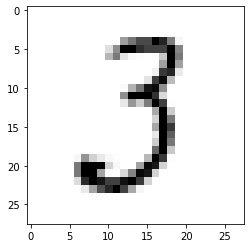

LABEL: 3
INPUT:


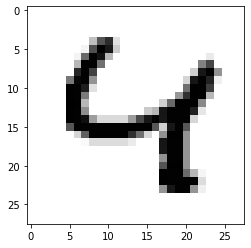

LABEL: 4


In [ ]:
#let's try the plotting function
plot_digit(X_train,y_train,110)
plot_digit(X_test,y_test,42200)

## TO DO 1
Run SVM with 5-fold cross validation to pick the best kernel and values of parameters. We provide some potential choice for parameters, but change the grid if needed (e.g., it takes too long). For the SVM for classification use SVC from sklearn.svm; for the grid search we suggest you use GridSearchCV from sklearn.model_selection, but you can implement your own cross-validation for model selection if you prefer.

Finally, print the best parameters used as well as the score obtained by the best model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import pandas as pd

param_grid = [
    {'C': [1, 10, 100], 'kernel': ['linear']},
    {'C': [1, 10, 100], 'gamma': [0.01,0.1,1.], 'kernel': ['rbf']},
    {'C': [1, 10, 100], 'gamma': [0.01,0.1,1.], 'kernel': ['poly'], 'degree':[2]}
 ]
clf = GridSearchCV(SVC(),param_grid , cv=5, return_train_score =False)

clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100], 'kernel': ['linear']},
                         {'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1.0],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100], 'degree': [2],
                          'gamma': [0.01, 0.1, 1.0], 'kernel': ['poly']}])

In [ ]:
df = pd.DataFrame(clf.cv_results_)
df[['param_kernel','param_C' ,'param_degree' ,'mean_test_score']]

,param_kernel,param_C,param_degree,mean_test_score
0,linear,1,NaN,0.838
1,linear,10,NaN,0.838
2,linear,100,NaN,0.838
3,rbf,1,NaN,0.850
4,rbf,1,NaN,0.528
5,rbf,1,NaN,0.120
6,rbf,10,NaN,0.868
7,rbf,10,NaN,0.540
8,rbf,10,NaN,0.124
9,rbf,100,NaN,0.868


In [ ]:
print(f'best Parameter is : {clf.best_params_}')
print(f'best Score is : {clf.best_score_}')

best Parameter is : {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
best Score is : 0.868


## TO DO 2
For the "best" SVM kernel and choice of parameters from above, train the model on the entire training set and measure the training error. Also make predictions on the test set and measure the test error. Print the training and the test error.

In [ ]:
#get training and test error for the best SVM model from CV
best_SVM = SVC(C= 10, gamma= 0.01, kernel= 'rbf')

# fit the model on the entire training set
# ADD CODE
best_SVM.fit(X_train, y_train)

#get the training and test error
training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.105496


## Use logistic regression for comparison

## TO DO 3

Just for comparison let's also use logistic regression, first with the default values of the parameter for regularization and then with cross-validation to fix the value of the parameters. For cross validation, use 5-fold cross validation and the default values of the regularization parameters for the function linear_model.LogisticRegressionCV(...).

Note: during training you may receive a "ConvergenceWarning" that indicates that the logistic regression solver did not converge to the optimal result. Given the scope of the notebook, we can ignore such warning but in real-world scenarios you should take corrective measures such as increasing the number of training iterations and/or the runtime for training or picking a different optimizer

In [ ]:
from sklearn import linear_model

lr = linear_model.LogisticRegression()
# fit the model on the training data
lr.fit(X_train, y_train)

#compute training and test error for model above
training_error = 1.-lr.score(X_train, y_train)
test_error = 1.-lr.score(X_test, y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

#logistic regression with 5-fold CV: you can use use linear_model.LogisticRegressionCV
# use 5-fold CV to find the best choice of the parameter, than train

from sklearn.linear_model import LogisticRegressionCV
# the model on the entire training set
lr_cv =LogisticRegressionCV(cv=5).fit(X_train, y_train)
training_error_cv = 1.-lr_cv.score(X_train, y_train)
test_error_cv = 1.-lr_cv.score(X_test, y_test)

print ("Best logistic regression training error with CV: %f" % training_error_cv)
print ("Best logistic regression test error with CV: %f" % test_error_cv)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best logistic regression training error: 0.000000
Best logistic regression test error: 0.156331


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best logistic regression training error with CV: 0.002000
Best logistic regression test error with CV: 0.153237


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## TO DO 5
Write the code that finds and plots a digit that is missclassified by logistic regression (optimized for the regularization parameter) and correctly classified by the "best" SVM.

(-0.5, 27.5, 27.5, -0.5)

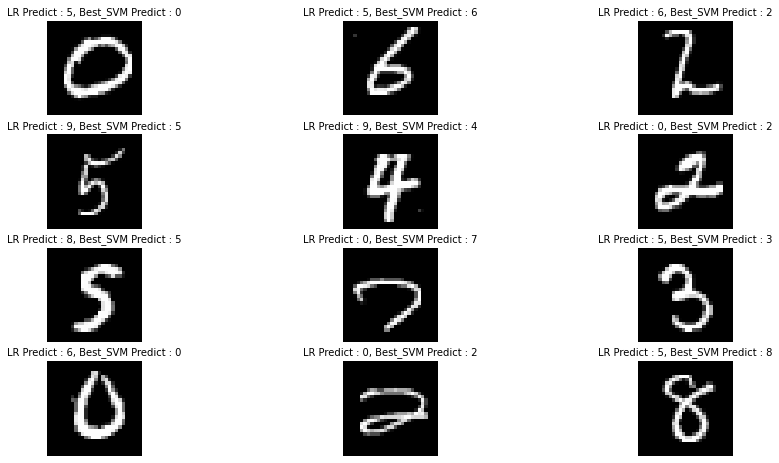

In [ ]:
# Create the confusion matrix for the dev data
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

lr_predictions = lr.predict(X_test)
lr_confusion = confusion_matrix(y_test, lr_predictions)
best_SVM_predictions = best_SVM.predict(X_test)
best_SVM_confusion = confusion_matrix(y_test, best_SVM_predictions)


misclassifiedIndexes = np.squeeze(np.where(y_test!=lr_predictions))
corrclassifiedIndexes  = np.squeeze(np.where(y_test==best_SVM_predictions))
#I just want to plot first 12 itersections
Indexes = np.intersect1d(corrclassifiedIndexes, misclassifiedIndexes)[:12]


fig, ax = plt.subplots(4,3,figsize=(15,8))
ax = ax.ravel()
for i, badIndex in enumerate(Indexes):
    ax[i].imshow(np.reshape(X_test[badIndex], (28, 28)), cmap=plt.cm.gray)
    ax[i].set_title(f'LR Predict : {lr_predictions[badIndex]}, '
                    f'Best_SVM Predict : {best_SVM_predictions[badIndex]}', fontsize = 10)
    ax[i].set(frame_on=False)
    ax[i].axis('off')
plt.box(False)
plt.axis('off')

## More data
Now let's do the same but using 1000 data points for training. 

## TO DO 6
Repeat the entire analysis above using 1000 samples. Of course you can copy the code from above (but no need to copy markdown comments).

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import pandas as pd

m_training = 1000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]
np.unique(y_train, return_counts = True)

param_grid = [
    {'C': [1, 10, 100], 'kernel': ['linear']},
    {'C': [1, 10, 100], 'gamma': [0.01,0.1,1.], 'kernel': ['rbf']},
    {'C': [1, 10, 100], 'gamma': [0.01,0.1,1.], 'kernel': ['poly'], 'degree':[2]}
 ]
clf = GridSearchCV(SVC(),param_grid , cv=5, return_train_score =False)

clf.fit(X_train, y_train)
print(f'best Parameter is : {clf.best_params_}')
print(f'best Score is : {clf.best_score_}')

best Parameter is : {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
best Score is : 0.901


In [ ]:
#get training and test error for the best SVM model from CV
best_SVM = SVC(C= 10, gamma= 0.01, kernel= 'rbf')

# fit the model on the entire training set
# ADD CODE
best_SVM.fit(X_train, y_train)

#get the training and test error
training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.079667


In [ ]:
lr = linear_model.LogisticRegression()
# fit the model on the training data
lr.fit(X_train, y_train)

#compute training and test error for model above
training_error = 1.-lr.score(X_train, y_train)
test_error = 1.-lr.score(X_test, y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

#logistic regression with 5-fold CV: you can use use linear_model.LogisticRegressionCV
# use 5-fold CV to find the best choice of the parameter, than train

from sklearn.linear_model import LogisticRegressionCV
# the model on the entire training set
lr_cv =LogisticRegressionCV(cv=5).fit(X_train, y_train)
training_error_cv = 1.-lr_cv.score(X_train, y_train)
test_error_cv = 1.-lr_cv.score(X_test, y_test)

print ("Best logistic regression training error with CV: %f" % training_error_cv)
print ("Best logistic regression test error with CV: %f" % test_error_cv)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best logistic regression training error: 0.000000
Best logistic regression test error: 0.133203


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best logistic regression training error with CV: 0.065000
Best logistic regression test error with CV: 0.130290
